<a href="https://colab.research.google.com/github/emiliapo/HealthyAgeing/blob/Working/HealthyAgeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
sys.path.append('/content/drive/MyDrive/HealthyAgeing')

Number of files importing: 426
425 files left to import..
424 files left to import..
423 files left to import..
422 files left to import..
421 files left to import..
420 files left to import..
419 files left to import..
418 files left to import..
417 files left to import..
416 files left to import..
415 files left to import..
414 files left to import..
413 files left to import..
412 files left to import..
411 files left to import..
410 files left to import..
409 files left to import..
408 files left to import..
407 files left to import..
406 files left to import..
405 files left to import..
404 files left to import..
403 files left to import..
402 files left to import..
401 files left to import..
400 files left to import..
399 files left to import..
398 files left to import..
397 files left to import..
396 files left to import..
395 files left to import..
394 files left to import..
393 files left to import..
392 files left to import..
391 files left to import..
390 files left to import

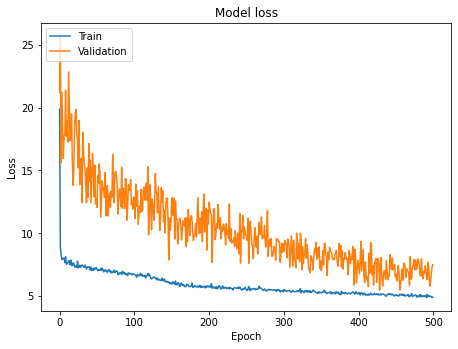

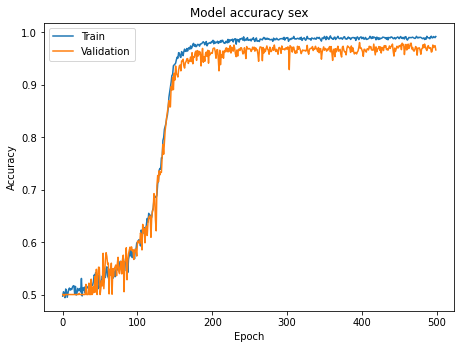

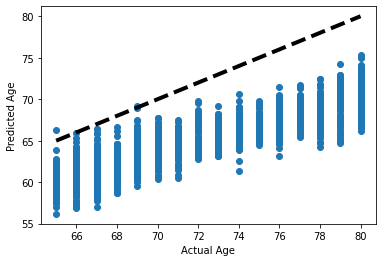

mean_squared_error sex: 0.024071335834243823
ROOT mean_squared_error sex: 0.1551493984333933
mean_absolute_error sex: 0.037794232549583535

mean_squared_error age: 55.581665340069065
ROOT mean_squared_error age: 7.455311216848634
mean_absolute_error age: 7.090139924080719
Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       852
           1       0.98      0.96      0.97       852

    accuracy                           0.97      1704
   macro avg       0.97      0.97      0.97      1704
weighted avg       0.97      0.97      0.97      1704

Results:
after training
6816
6816
6816
6816


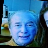


[69  1]
Index: 353
Actual age: 69
Predicted Age: 62
Actual sex: Male
Predicted Sex: Female


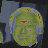


[74  1]
Index: 5952
Actual age: 74
Predicted Age: 67
Actual sex: Male
Predicted Sex: Female


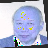


[76  1]
Index: 5605
Actual age: 76
Predicted Age: 68
Actual sex: Male
Predicted Sex: Female


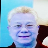


[78  1]
Index: 72
Actual age: 78
Predicted Age: 70
Actual sex: Male
Predicted Sex: Female


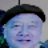


[72  1]
Index: 3112
Actual age: 72
Predicted Age: 65
Actual sex: Male
Predicted Sex: Female


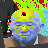


[79  1]
Index: 1900
Actual age: 79
Predicted Age: 68
Actual sex: Male
Predicted Sex: Female


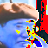


[67  1]
Index: 6688
Actual age: 67
Predicted Age: 58
Actual sex: Male
Predicted Sex: Female


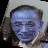


[78  1]
Index: 152
Actual age: 78
Predicted Age: 71
Actual sex: Male
Predicted Sex: Female


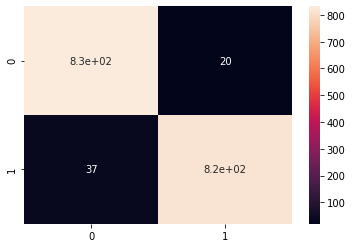

In [11]:
import cv2
import os
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import seaborn as sns
from google.colab.patches import cv2_imshow
from google.colab import drive
import random
import decimal

import DataAugmentation

last = []
labels = []
images = []
ageList = []
sexList = []

class Image:

    def image_processing(self, folder, images, labels):
      files = os.listdir(folder)
      random.shuffle(files)
      n = len(files)
      print("Number of files importing: " + str(n))
      for filename in files:
        img = cv2.imread(folder+'/'+filename)
        if img is not None:
          label = self.establishLabels(filename)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img, (48, 48))
          images.append(img)

          labels.append(label)
          n -= 1
          print(str(n) + " files left to import..")

      dataclass = DataAugmentation.DataAugmentation()
      augmentedDataDict = dataclass.augment(images, labels)
      images = augmentedDataDict['images'].copy()
      labels = augmentedDataDict['labels'].copy()
      
      nofFiles = len(images.copy())
      #self.showProcessedImage(564)

      # convert the labels and images to NumPy arrays

      images_f = np.array(images)
      sexList_f = np.array(sexList)
      ageList_f = np.array(ageList)
      labels_f = np.array(labels)

      np.save('image.npy', images_f)
      np.save('gender.npy', sexList_f)
      np.save('age.npy', ageList_f)

      #self.showSexDistribution(sexList_f)
      #self.showAgeDistribution(ageList_f)

      # normalise the images array by dividing it with 255
      print("Number of images" +str(len(images_f)))
      images_f_2 = images_f / 255
      X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)
      #Y_train[0:5]

      Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
      Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]

      # Y_train_2[0][0:5]

      # Y_train_2[1][0:5]

      Model = self.model((48, 48, 3))
      print(Model.summary())

      print("before training")
      print(len(images))
      print(len(labels))
      print(len(images_f))
      print(len(labels_f))

      self.trainAndEvaluateModel(Model, X_train, X_test, Y_train, Y_test, Y_train_2, Y_test_2)
      print("after training")
      print(len(images))
      print(len(labels))
      print(len(images_f))
      print(len(labels_f))
      self.testRandomImages(8, nofFiles, images_f, images_f_2, labels_f, Model)


    def establishLabels(self, filename):
        name = filename.split(".")[0]
        splitName = name.split("A")
        s = int(splitName[-1])
        a = int(splitName[-2])
        #output = {'sex': s, 'age': a}
        output = [a, s]

        return output
      
    def showProcessedImage(self, index):

        cv2_imshow(images[index])
        print(labels[index])

        print("Press any key to exit...")
        cv2.waitKey(0) #waits for any key press

    def showSexDistribution(self, sexList_f):
        values, counts = np.unique(sexList_f, return_counts=True)
        #print(counts) #returns 207, 219

        plt.xlabel("Sex")
        plt.ylabel("Distribution")
        sex = ['Female', 'Male']
        plt.bar(sex, counts)
        plt.show()


    def showAgeDistribution(self, ageList_f):
        values, counts = np.unique(ageList_f, return_counts=True)
        #print(counts)

        plt.plot(values, counts)
        plt.xlabel('ages')
        plt.ylabel('distribution')
        plt.show()

    def testRandomImages(self, num, nOfOGFiles, images_f, images_f_2, labels_f, Model):
      for i in range(num):
        max = int(nOfOGFiles - 1)
        index = random.randint(0, max)
        self.test_image(index, images_f, images_f_2, labels_f, Model)

    def Convolution(self, input_tensor, filters):
        x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(
            input_tensor)
        x = Dropout(0.1)(x)
        x = Activation('relu')(x)
        return x


    def model(self, input_shape):
        inputs = Input((input_shape))

        conv_1 = self.Convolution(inputs, 32)
        maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
        conv_2 = self.Convolution(maxp_1, 64)
        maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
        conv_3 = self.Convolution(maxp_2, 128)
        maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
        conv_4 = self.Convolution(maxp_3, 256)
        maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
        flatten = Flatten()(maxp_4)
        dense_1 = Dense(64, activation='sigmoid')(flatten)
        dense_2 = Dense(64, activation='relu')(flatten)
        drop_1 = Dropout(0.2)(dense_1)
        drop_2 = Dropout(0.2)(dense_2)
        output_1 = Dense(1, activation="sigmoid", name='sex_out')(drop_1)
        output_2 = Dense(1, activation="relu", name='age_out')(drop_2)

        model = Model(inputs=[inputs], outputs=[output_1, output_2])
        model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam",
                      metrics=["accuracy"])
        return model

    def trainAndEvaluateModel(self, Model, X_train, X_test, Y_train,
                              Y_test, Y_train_2, Y_test_2):
        fle_s='Age_sex_detection.h5'
        checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='auto',
                                       save_freq='epoch')
        Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
        callback_list=[checkpointer,Early_stop]

        History = Model.fit(X_train, Y_train_2,
                 validation_data=(X_test, Y_test_2),
                 epochs=500,
                 batch_size = 64,
                 callbacks=[callback_list])
        
        print("History: ")
        print(History.history)
        
        Model.evaluate(X_test, Y_test_2)
        pred=Model.predict(X_test)

        #print(pred[1])

        plt.plot(History.history['loss'])
        plt.plot(History.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                                wspace=0.35)
        plt.show()
        
        #For sex

        plt.plot(History.history['sex_out_accuracy'])
        plt.plot(History.history['val_sex_out_accuracy'])
        plt.title('Model accuracy sex')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                                wspace=0.35)
        plt.show()
        
        #for age

        fig, ax = plt.subplots()
        ax.scatter(Y_test_2[1], pred[1])
        ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
        ax.set_xlabel('Actual Age')
        ax.set_ylabel('Predicted Age')

        plt.show()

        # Calculation of Mean Squared Error (MSE) for sex
        msesex = mean_squared_error(Y_test_2[0], pred[0])
        maesex = mean_absolute_error(Y_test_2[0], pred[0])
        print("mean_squared_error sex: " + str(msesex))
        print("ROOT mean_squared_error sex: " + str(math.sqrt(msesex)))
        print("mean_absolute_error sex: " + str(maesex) + "\n")

        # Calculation of Mean Squared Error (MSE) for age
        mseage = mean_squared_error(Y_test_2[1], pred[1])
        maeage = mean_absolute_error(Y_test_2[1], pred[1])
        print("mean_squared_error age: " + str(mseage))
        print("ROOT mean_squared_error age: " + str(math.sqrt(mseage)))
        print("mean_absolute_error age: " + str(maeage))

        #for sex
        j = 0
        Pred_l=[]
        while(j<len(pred[0])):
          Pred_l.append(int(np.round(pred[0][j])))
          j+=1

        print("Report:")
        report=classification_report(Y_test_2[0], Pred_l)
        print(report)

        print("Results:")
        results = confusion_matrix(Y_test_2[0], Pred_l)
        sns.heatmap(results, annot=True)


    def test_image(self, ind, images_f, images_f_2, labels_f, Model):
      cv2_imshow(images_f[ind])
      image_test=images_f_2[ind]
      pred_1=Model.predict(np.array([image_test]))
      sex_f=['Male','Female']
      age=int(np.round(pred_1[1][0]))
      sex=int(np.round(pred_1[0][0]))
      actualsex = ""
      print()
      print(labels_f[ind])
      if labels_f[ind][1] == 0:
        actualsex = "Female"
      if labels_f[ind][1] == 1:
        actualsex = "Male"
      print("Index: "+ str(ind))
      print("Actual age: " + str(labels_f[ind][0]))
      print("Predicted Age: "+ str(age))
      print("Actual sex: " + actualsex)
      print("Predicted Sex: "+ sex_f[sex])
        
folder = "/content/drive/MyDrive/HealthyAgeing/Data/Eastern_Elder_Faces"
Image().image_processing(folder, images, labels)